In [76]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
#Download historical stock data for Tesla (TSLA) from Yahoo Finance
stock = "TSLA"
df = yf.download(stock, start="2023-01-01", end="2025-07-14")

/tmp/ipython-input-77-1063746533.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start="2023-01-01", end="2025-07-14")
[*********************100%***********************]  1 of 1 completed


In [78]:
#Explore the dataset
print(df.shape)
print(df.columns)
print(df.head(2))

(632, 5)
MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2023-01-03  108.099998  118.800003  104.639999  118.470001  231402800
2023-01-04  113.639999  114.589996  107.519997  109.110001  180389000


In [81]:
df.columns = df.columns.get_level_values(0)  # Flatten column index if multi-level

In [80]:
df.columns.name = None # Remove column index name

In [82]:
df.head(2)

,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 632 entries, 2023-01-03 to 2025-07-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   632 non-null    float64
 1   High    632 non-null    float64
 2   Low     632 non-null    float64
 3   Open    632 non-null    float64
 4   Volume  632 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.6 KB


In [51]:
df.describe()

,Close,High,Low,Open,Volume
count,632.000000,632.000000,632.000000,632.000000,6.320000e+02
mean,243.040190,248.384636,237.355902,242.930079,1.146190e+08
std,68.836931,70.830110,67.056643,69.241704,4.027276e+07
min,108.099998,111.750000,101.809998,103.000000,3.716760e+07
25%,189.467499,194.082497,185.542500,188.480000,8.537245e+07
50%,235.730003,240.154999,230.840004,234.375000,1.092568e+08
75%,268.609993,274.882507,261.277512,268.394997,1.343045e+08
max,479.859985,488.540009,457.510010,475.899994,3.065906e+08


In [84]:
df.isnull().sum() # Check for missing values

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [85]:
# Prepare features (X) and target (y)
X = df.drop(["Close"],axis=1)
y = df['Close']

In [86]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Sort the test set index for proper plotting along timeline
y_test = y_test.sort_index()

In [88]:
# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Evaluate performance on training data
y_pred = model.predict(X_train)
print("Train R² Score:", r2_score(y_train, y_pred))
print("train RMSE:", mean_squared_error(y_train, y_pred))

Train R² Score: 0.9977374366813677
train RMSE: 11.143069753682347


In [90]:
# Evaluate performance on testing data
y_pred = model.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred))

Test R² Score: -1.189311718448855
Test RMSE: 8465.764837434272


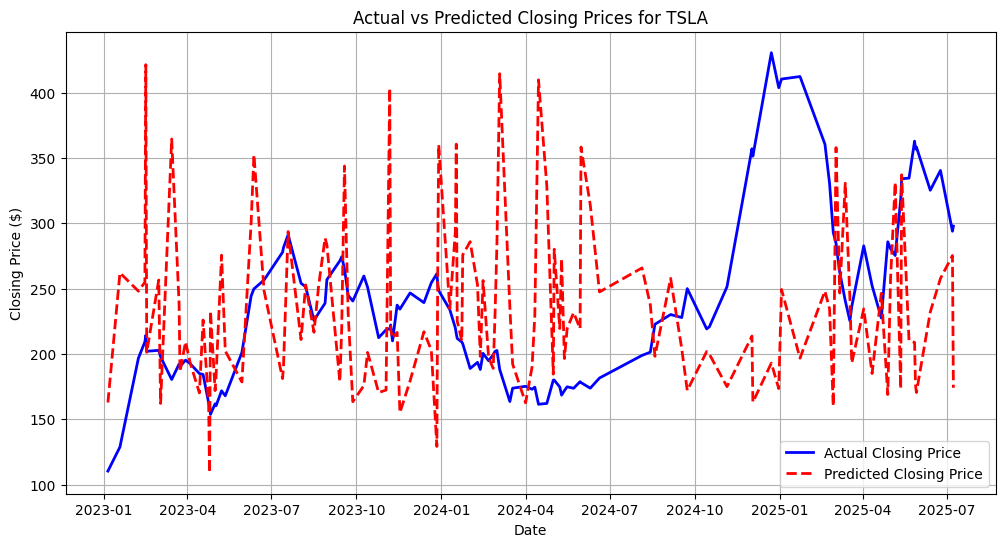

In [91]:
# Plot actual vs predicted closing prices

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Closing Price', color='blue', linewidth=2)
plt.plot(y_test.index, model.predict(X_test), label='Predicted Closing Price', color='red', linestyle='--', linewidth=2)
plt.title(f'Actual vs Predicted Closing Prices for {stock}')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()